In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [25]:
full = pd.read_csv('big-data-derby-2022/nyra_2019_complete.csv', header = None)
full.columns = ['track_id', 'race_date', 'race_number', 'program_number', 'trakus_index', 'latitude', 'longitude', 'distance_id', 'course_type', 'track_condition', 'run_up_distance', 'race_type', 'purse', 'post_time', 'weight_carried', 'jockey', 'odds', 'position_at_finish']
full.head()

/var/folders/jg/6trrgcbd7s94jnb11pjg88rr0000gn/T/ipykernel_95831/1589829724.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv('big-data-derby-2022/nyra_2019_complete.csv', header = None)


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


In [26]:
data = pd.DataFrame(full)
data.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


In [6]:
data.sample(n=5)

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
6529,AQU,2019-12-13,2,6,241,40.675585,-73.828754,800,D,GD,54,CLM,22000.0,1259,125,Silvestre Gonzalez,1090,7
4440965,AQU,2019-11-08,5,1,235,40.672407,-73.831184,600,O,FM,72,MSW,70000.0,220,119,Javier Castellano,105,1
5013020,AQU,2019-11-30,6,5,1,40.674213,-73.829577,850,T,GD,98,STR,55000.0,221,119,Declan Carroll,4550,7
64664,BEL,2019-05-23,9,2B,155,40.717477,-73.724068,850,D,SY,46,CLM,50000.0,727,124,Dylan Davis,200,2
2914360,SAR,2019-08-24,7,8,33,43.069311,-73.770528,700,D,FT,32,STK,500000.0,300,118,Joel Rosario,1430,4


In [29]:
data_joel = data[data['jockey'] == 'Joel Rosario']  
data_joel_drop = data_joel.drop_duplicates(subset=['race_number'])
data_joel_drop

data_eric = data[data['jockey'] == 'Eric Cancel']  
data_eric_drop = data_eric.drop_duplicates(subset=['race_number'])

data_manuel = data[data['jockey'] == 'Manuel Franco'] 
data_manuel_drop = data_manuel.drop_duplicates(subset=['race_number'])

data_dylan = data[data['jockey'] == 'Dylan Davis'] 
data_dylan_drop = data_dylan.drop_duplicates(subset=['race_number'])

data_reylu = data[data['jockey'] == 'Reylu Gutierrez']  
data_reylu_drop = data_reylu.drop_duplicates(subset=['race_number'])


data_reduced = pd.concat([data_joel_drop, data_eric_drop, data_manuel_drop, data_dylan_drop, data_reylu_drop], ignore_index=True, sort=False)

data_reduced = data_reduced.drop(columns = ['latitude', 'longitude', 'program_number'])
data_reduced

,track_id,race_date,race_number,trakus_index,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,BEL,2019-06-01,6,225,800,T,GD,166,CLM,50000.0,412,124,Joel Rosario,1250,8
1,BEL,2019-10-25,7,379,850,D,FT,50,CLM,65000.0,441,122,Joel Rosario,2180,5
2,BEL,2019-06-01,3,343,850,D,FT,44,CLM,36000.0,235,124,Joel Rosario,620,5
3,BEL,2019-05-12,1,1,700,D,SY,36,CLM,28000.0,132,123,Joel Rosario,780,1
4,BEL,2019-05-23,9,1,850,D,SY,46,CLM,50000.0,727,124,Joel Rosario,390,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,AQU,2019-01-19,9,241,800,D,FT,54,CLM,25000.0,430,116,Reylu Gutierrez,720,2
58,AQU,2019-01-11,6,100,550,D,FT,60,CLM,46000.0,327,117,Reylu Gutierrez,2650,4
59,AQU,2019-02-02,10,1,650,D,FT,34,CLM,28000.0,503,117,Reylu Gutierrez,740,7
60,BEL,2019-05-04,11,21,800,D,SY,52,STK,200000.0,540,116,Reylu Gutierrez,1660,4


In [30]:
from sklearn.preprocessing import LabelEncoder


def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

Encoder(data_reduced)



,track_id,race_date,race_number,trakus_index,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,1,21,6,225,800,3,2,166,2,50000.0,412,124,2,1250,8
1,1,36,7,379,850,0,1,50,2,65000.0,441,122,2,2180,5
2,1,21,3,343,850,0,1,44,2,36000.0,235,124,2,620,5
3,1,17,1,1,700,0,4,36,2,28000.0,132,123,2,780,1
4,1,19,9,1,850,0,4,46,2,50000.0,727,124,2,390,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,2,9,241,800,0,1,54,2,25000.0,430,116,4,720,2
58,0,0,6,100,550,0,1,60,2,46000.0,327,117,4,2650,4
59,0,4,10,1,650,0,1,34,2,28000.0,503,117,4,740,7
60,1,15,11,21,800,0,4,52,6,200000.0,540,116,4,1660,4


In [31]:
X = data_reduced.values[:, :14]  
y = data_reduced.values[:, 14]   

In [32]:
X = (X - X.min() / (X.max() - X.min()))

In [33]:
for i in range(5):
    print('X =', X[i], ', y =', y[i])

X = [1.00e+00 2.10e+01 6.00e+00 2.25e+02 8.00e+02 3.00e+00 2.00e+00 1.66e+02
 2.00e+00 5.00e+04 4.12e+02 1.24e+02 2.00e+00 1.25e+03] , y = 8.0
X = [1.00e+00 3.60e+01 7.00e+00 3.79e+02 8.50e+02 0.00e+00 1.00e+00 5.00e+01
 2.00e+00 6.50e+04 4.41e+02 1.22e+02 2.00e+00 2.18e+03] , y = 5.0
X = [1.00e+00 2.10e+01 3.00e+00 3.43e+02 8.50e+02 0.00e+00 1.00e+00 4.40e+01
 2.00e+00 3.60e+04 2.35e+02 1.24e+02 2.00e+00 6.20e+02] , y = 5.0
X = [1.00e+00 1.70e+01 1.00e+00 1.00e+00 7.00e+02 0.00e+00 4.00e+00 3.60e+01
 2.00e+00 2.80e+04 1.32e+02 1.23e+02 2.00e+00 7.80e+02] , y = 1.0
X = [1.00e+00 1.90e+01 9.00e+00 1.00e+00 8.50e+02 0.00e+00 4.00e+00 4.60e+01
 2.00e+00 5.00e+04 7.27e+02 1.24e+02 2.00e+00 3.90e+02] , y = 3.0


In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.37894671399873714


In [ ]:
# "In scientific studies, the R-squared may need to be above 0.95 for a regression model to be considered reliable. 
# In other domains, an R-squared of just 0.3 may be sufficient if there is extreme variability in the dataset." 

# R2 0.3 - 0.5 is moderate. 



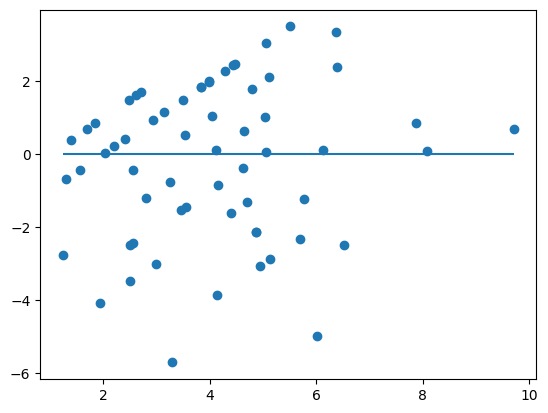

In [42]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [43]:
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

Feature: 0, Score: 0.40334
Feature: 1, Score: -0.01014
Feature: 2, Score: 0.18413
Feature: 3, Score: 0.00312
Feature: 4, Score: -0.00698
Feature: 5, Score: 0.07492
Feature: 6, Score: 0.16262
Feature: 7, Score: 0.00696
Feature: 8, Score: -0.38652
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00094
Feature: 11, Score: -0.03382
Feature: 12, Score: 0.24099
Feature: 13, Score: 0.00058


In [ ]:
# Top Importance: 0(track_id), 2(race_number), 5(course_type), 6(track_condition) 8(race_type), 11(weight), 12(jockey)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
 model.fit(X_train, y_train)

LinearRegression()

In [46]:
model.score(X_test, y_test) 

-0.3442362765819662